In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import misc
from segmentation import castClrs
from scipy.ndimage.filters import gaussian_filter
from skimage import color
from skimage import feature

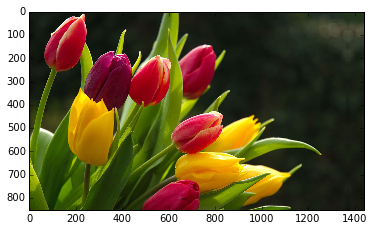

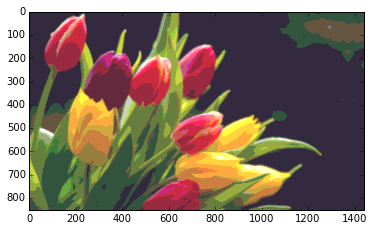

In [3]:
image = misc.imread('flower.jpg')

"""
# Image->castClrs
segmentObj = castClrs(image)
segmentObj.segment(segC0=4, segC1=4, segC2=4, clrs='rgb', mode='mean')
segmentObj.showRGB()
"""

#Image->Gaussfilter
sigma = 3
filterImage = image.copy()
filterImage[:,:,0] = gaussian_filter(image[:,:,0], sigma)
filterImage[:,:,1] = gaussian_filter(image[:,:,1], sigma)
filterImage[:,:,2] = gaussian_filter(image[:,:,2], sigma)

plt.imshow(image)
plt.show()

# Image->Gaussfilter->castClrs
segmentObj2 = castClrs(filterImage)
segmentObj2.segment(segC0=5, segC1=6, segC2=4, clrs='rgb', mode='ceil')
segmentObj2.showRGB()
